Import Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

Import Data

In [137]:
data_raw = pd.read_csv("final_test.csv")
data_raw

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [138]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [139]:
data_raw.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [140]:
data_raw['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

<AxesSubplot: xlabel='size', ylabel='count'>

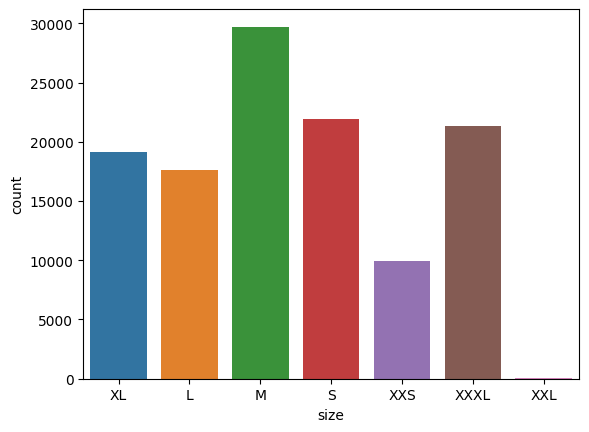

In [141]:
sns.countplot(x=data_raw['size'])

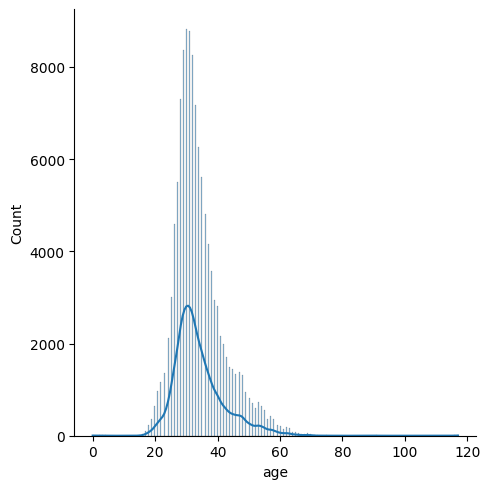

In [142]:
sns.displot(x=data_raw['age'], kde=True)

In [143]:
data_raw.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [144]:
data_raw = data_raw.dropna()

In [145]:
# data_raw['age'] = data_raw['age'].fillna(data_raw['age'].mean())
# data_raw['height'] = data_raw['height'].fillna(data_raw['height'].mean())

In [146]:
data_raw.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

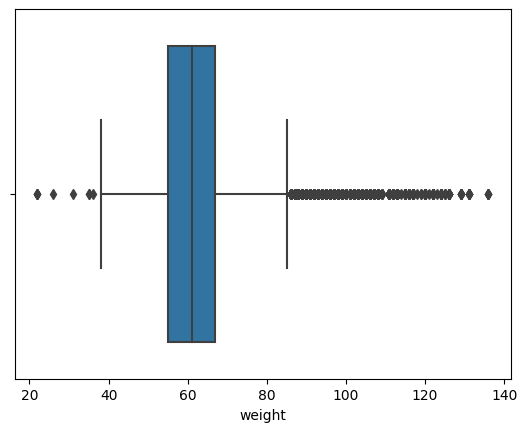

In [147]:
sns.boxplot(x=data_raw['weight'])
plt.show()

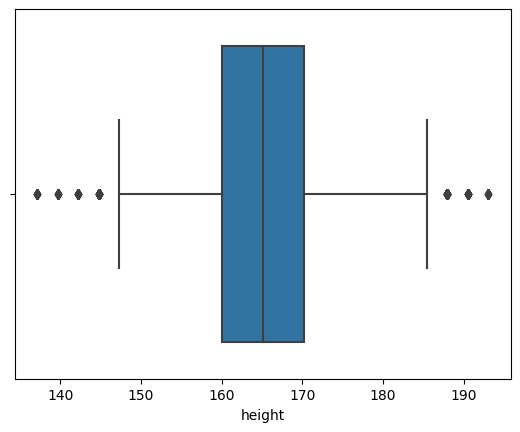

In [148]:
sns.boxplot(x=data_raw['height'])
plt.show()

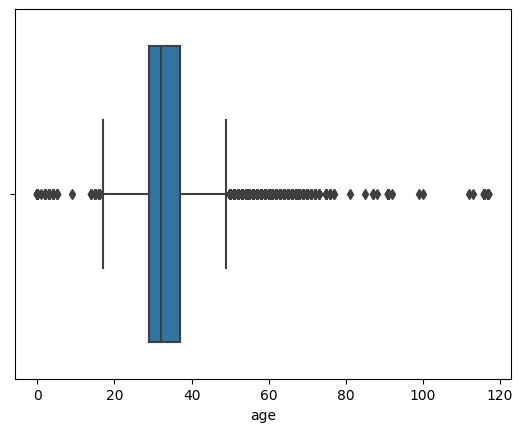

In [149]:
sns.boxplot(x=data_raw['age'])
plt.show()

In [150]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lists = df.index[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    return lists

In [151]:
index_lists = []
for feature in ['weight', 'age', 'height']:
    index_lists.extend(outliers(data_raw, feature))

In [ ]:
index_lists

In [153]:
def remove(df, lists):
    lists = sorted(set(lists))
    df = df.drop(lists)
    return df

In [154]:
df_cleaned = remove(data_raw, index_lists)
df_cleaned.shape

(109063, 4)

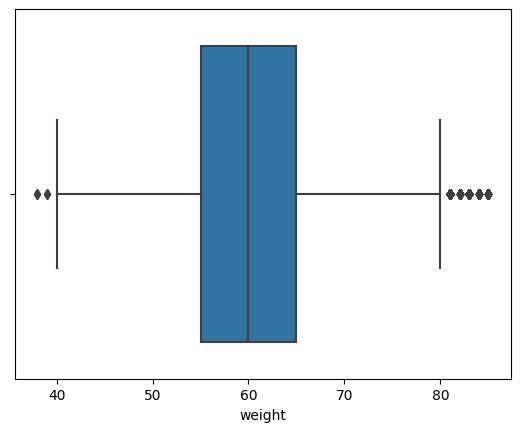

In [155]:
sns.boxplot(x=df_cleaned['weight'])
plt.show()

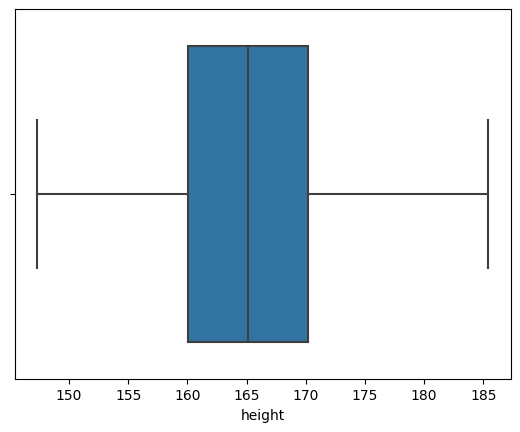

In [156]:
sns.boxplot(x=df_cleaned['height'])
plt.show()

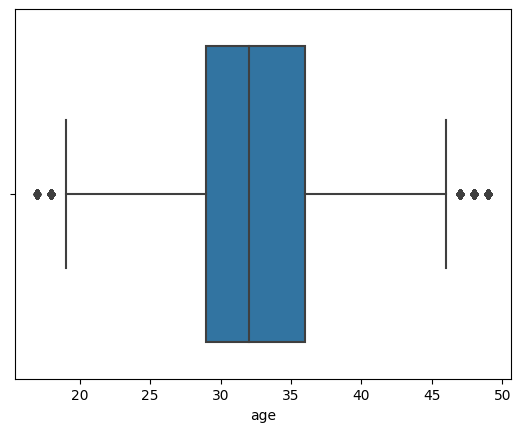

In [157]:
sns.boxplot(x=df_cleaned['age'])
plt.show()

In [158]:
# df_cleaned = df_cleaned.to_numpy()
data_raw = data_raw.to_numpy()

In [159]:
# df_cleaned
data_raw

array([[62, 28.0, 172.72, 'XL'],
       [59, 36.0, 167.64, 'L'],
       [61, 34.0, 165.1, 'M'],
       ...,
       [61, 31.0, 172.72, 'M'],
       [74, 31.0, 167.64, 'XL'],
       [70, 30.0, 167.64, 'XL']], dtype=object)

In [160]:
size = ["XXS","S","M","L","XL","XXL","XXXL"]

In [161]:
X = []
y = []
for i in data_raw:
    X.append(i[0:3])
    y.append(size.index(i[3]))

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [163]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X)

In [164]:
accuracy_score(y, y_pred)

0.5798679009340931

In [165]:
test = size[model.predict([[80,28,190]])[0]]
test

'XL'

In [167]:
pickle.dump(model, open('model.pkl', 'wb'))